In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [75]:
from sklearn.model_selection import train_test_split

In [150]:
df = pd.read_csv('50_Startups.csv')


In [77]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [78]:
#We have to find the information and description of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [79]:
# Now convert the State column into a numeric column

df['State'].replace(['Florida','New York','California'],[0,1,2],inplace=True)

In [80]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.020000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.820403,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [81]:
# Now we will split the data in dependent and independent variales as an array

X = df.iloc[:,:-1].values
print(X.shape)
print(X)

(50, 4)
[[1.6534920e+05 1.3689780e+05 4.7178410e+05 1.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 2.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 1.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 1.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 2.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 0.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 1.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 2.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 0.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 2.0000000e+00]
 [9.3863750e+04 1.2732038e+05 2.4983944e+05 0.0000000e+00]
 [9.1992390e+04 1.3549507e+05 2.5266493e+05 2.0000000e+00]
 [1.1994324e+05 1.5654742e+05 2.5651292e+05 0.0000000e+00]
 [1.1452361e+05 1.2261684e+05 2.6177623e+05 1.0000000e+00]
 [7.8013110e+04 1.2159755e+05 2.6434606e+05 2.00

In [82]:
y = df.iloc[:,3].values
print(y.shape)
print(y)

(50,)
[1 2 0 1 0 1 2 0 1 2 0 2 0 2 0 1 2 1 0 1 2 1 0 0 1 2 0 1 0 1 0 1 2 0 2 1 0
 2 1 2 2 0 2 1 2 1 0 2 1 2]


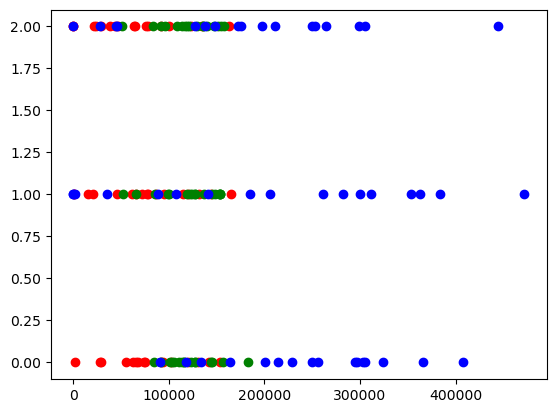

In [83]:
# Need to check the behaviour of data whether linear Regression can be use for it or not



plt.scatter(X[:,0],y,color='red')
plt.scatter(X[:,1],y,color='green')
plt.scatter(X[:,2],y,color='blue')
plt.show()

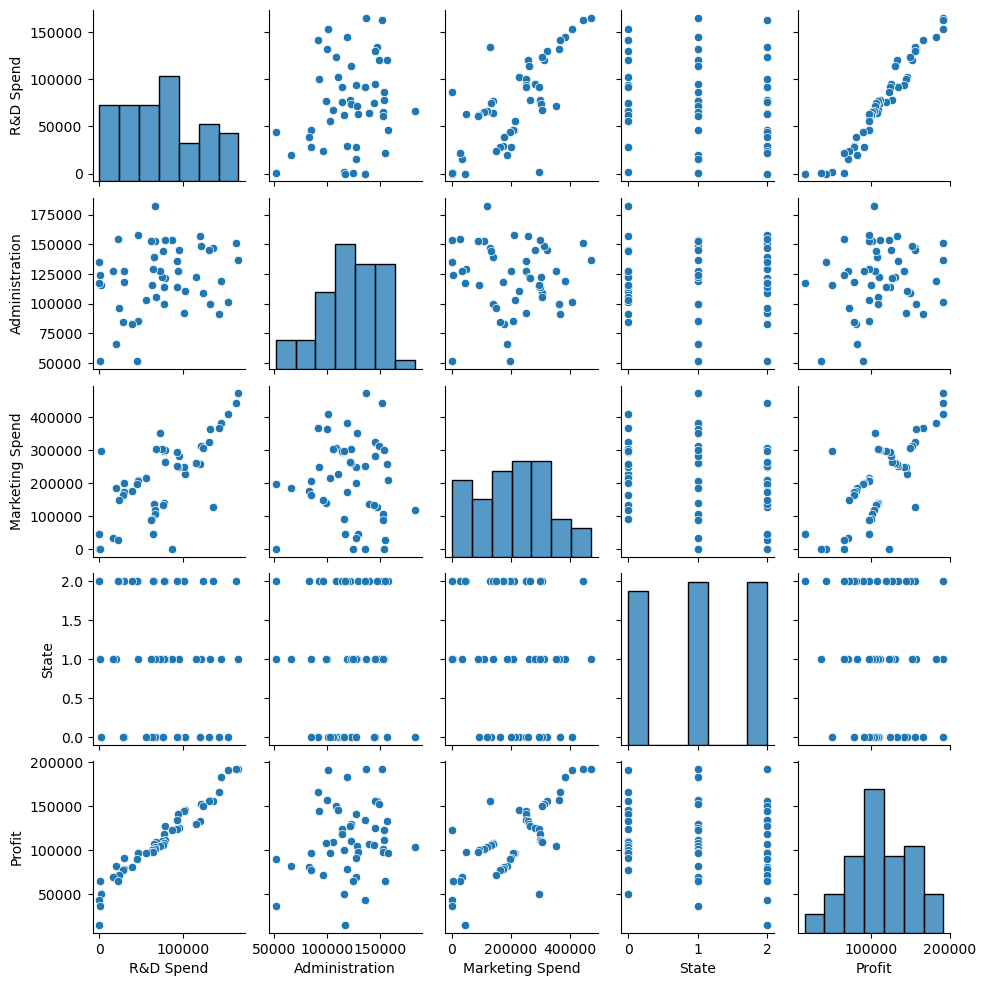

In [84]:
import seaborn as sns

sns.pairplot(data = df, height = 2)  
plt.show()

As we can see there is no relationship between the state column 

Correlation coefficient matrix for each independent variable: 
                  R&D Spend  Administration  Marketing Spend
R&D Spend         1.000000        0.241955         0.724248
Administration    0.241955        1.000000        -0.032154
Marketing Spend   0.724248       -0.032154         1.000000


[]

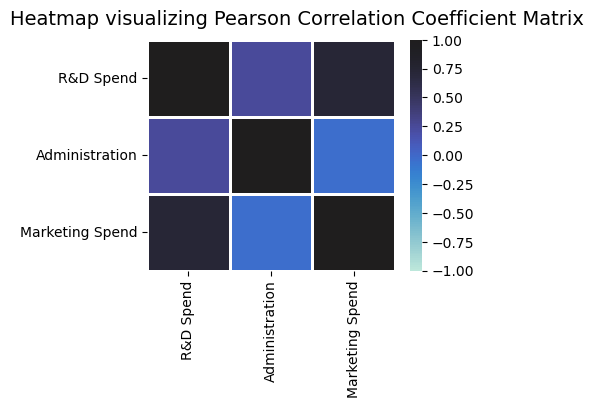

In [85]:
corr = df[["R&D Spend","Administration","Marketing Spend"]].corr()  
print('Correlation coefficient matrix for each independent variable: \n', corr)

figure, axis = plt.subplots(figsize = (4, 3))  
  

sns.heatmap(corr,  vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap visualizing Pearson Correlation Coefficient Matrix', fontsize = 14)  
plt.plot()

In [86]:
# As we can see data is distributted in a linear line manner so we wil you Linear regression algorithm 
# First need to split the data into test and train

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [87]:
# check the dimestion
print(X_test.ndim)
print(X_train.ndim)
print(y_test.ndim)
print(y_train.ndim)

2
2
1
1


In [88]:
# now import the Linear regration class and fit the data

from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_test,y_test)

LinearRegression()

In [89]:
# Now Get the coefficint and the intersection of the Line of the model

lrm.coef_

array([-1.32972058e-15,  1.77820244e-15,  6.09044681e-16,  1.00000000e+00])

In [90]:
# Intercept

lrm.intercept_

-2.4240731644198377e-10

## Model Prediction

In [91]:
y_predict = lrm.predict(X_test)

In [92]:
# check the predicted output

print(y_predict)

[ 6.65009314e-11  2.00000000e+00 -4.16952621e-11 -2.86941971e-11
 -1.81340240e-11  1.00000000e+00  1.00000000e+00  1.00000000e+00
  6.22681622e-11 -4.58443736e-11]


In [93]:
# Comparing the result
df1 = pd.DataFrame(y_test,columns=['Orignal data'])
df2 = pd.DataFrame(y_predict,columns = ['Predicted Result'])

pd.concat([df1,df2])

,Orignal data,Predicted Result
0,0.0,NaN
1,2.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
5,1.0,NaN
6,1.0,NaN
7,1.0,NaN
8,0.0,NaN
9,0.0,NaN


In [156]:
orignal_predict_df= pd.concat([df1,df2],axis=1)
orignal_predict_df

,Orignal data,Predicted Result
0,0,6.650093e-11
1,2,2.000000e+00
2,0,-4.169526e-11
3,0,-2.869420e-11
4,0,-1.813402e-11
5,1,1.000000e+00
6,1,1.000000e+00
7,1,1.000000e+00
8,0,6.226816e-11
9,0,-4.584437e-11


In [167]:
print(X_test)
test_df=pd.DataFrame(X_test,columns=["R&D Spend","Administration","Marketing Spend",'State'])
comb=pd.concat([orignal_predict_df,test_df],axis=1)
comb.head()

[[6.6051520e+04 1.8264556e+05 1.1814820e+05 0.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 2.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 0.0000000e+00]
 [2.7892920e+04 8.4710770e+04 1.6447071e+05 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00]
 [7.2107600e+04 1.2786455e+05 3.5318381e+05 1.0000000e+00]
 [2.0229590e+04 6.5947930e+04 1.8526510e+05 1.0000000e+00]
 [6.1136380e+04 1.5270192e+05 8.8218230e+04 1.0000000e+00]
 [7.3994560e+04 1.2278275e+05 3.0331926e+05 0.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00]]


,Orignal data,Predicted Result,R&D Spend,Administration,Marketing Spend,State
0,0,6.650093e-11,66051.52,182645.56,118148.20,0.0
1,2,2.000000e+00,100671.96,91790.61,249744.55,2.0
2,0,-4.169526e-11,101913.08,110594.11,229160.95,0.0
3,0,-2.869420e-11,27892.92,84710.77,164470.71,0.0
4,0,-1.813402e-11,153441.51,101145.55,407934.54,0.0


In [172]:
# Now compare the Y predicted data with the and actual Data X train data

import plotly.express as px

fig = px.scatter_3d(df,x= 'R&D Spend',y= 'Administration' ,z= 'Profit',color='State')
fig2=px.scatter_3d(comb,x='R&D Spend' ,y= 'Orignal data' ,z= 'Predicted Result',color='State')
fig3=px.scatter_3d(comb,x='Administration' ,y= 'Orignal data' ,z= 'Predicted Result',color='State')
fig4=px.scatter_3d(comb,x='Marketing Spend' ,y= 'Orignal data' ,z= 'Predicted Result',color='State')
#fig3=px.scatter_3d(x= X_test[:,0],y= y_predict ,z= y_test)'''
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
px.scatter_ternary
fig.show()
fig2.show()
fig3.show()
fig4.show()

In [173]:
# check the Accuracy of the data
## Model Evaluation

from sklearn import metrics

metrics.r2_score(y_test,y_predict)  # R2 score


1.0

In [174]:
# MSE score
metrics.mean_squared_error(y_test,y_predict) #(MSE=Mean squre error)

2.9400025118292516e-21

In [175]:
# RMSE
metrics.median_absolute_error(y_test,y_predict) #(MAE=Mean absolute error)

4.376981783809346e-11

In [176]:
#score(features,target) returns the R² score of our model which is the percentage of explained variance of the predictions by the model
lrm.score(X_test,y_test) #lrm.score first it will predict and then cheks score)

1.0